In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'Data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list Data/Cows/Injured_cow.jpg
Image not in ext list Data/Cows/54641a4e2d737bc10d0615f330b7f845f5ad9c1359dcc24e710159bea5c741c6_6174214.jpg
Image not in ext list Data/Cows/injured-bull-wound-his-eye-260nw-1675133917.jpg
Image not in ext list Data/Cows/750x450_773512-untitled1.webp
Image not in ext list Data/Cows/skynews-cow-cows_6289397.jpg
Image not in ext list Data/Cows/Cow.jpg
Image not in ext list Data/Cows/6128957041ec3.jpeg
Image not in ext list Data/Cows/ProstheticLimb24112021_Body2.jpg
Image not in ext list Data/Cows/608d0c143ca14.jpeg
Image not in ext list Data/Cows/ProstheticLimb24112021_Body3.jpg
Image not in ext list Data/Cows/AtulSariniFeat-1641119657442.jpg
Image not in ext list Data/Cows/hospital-animals-calves-cows-injured-260nw-1288919380.jpg
Image not in ext list Data/Cows/FB_IMG_1581622225681_1581624399.jpg
Image not in ext list Data/Cows/help-for-disabled-cows408538084.jpg
Image not in ext list Data/Cows/220301-injured-cow.webp
Image not in ext list

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 288 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

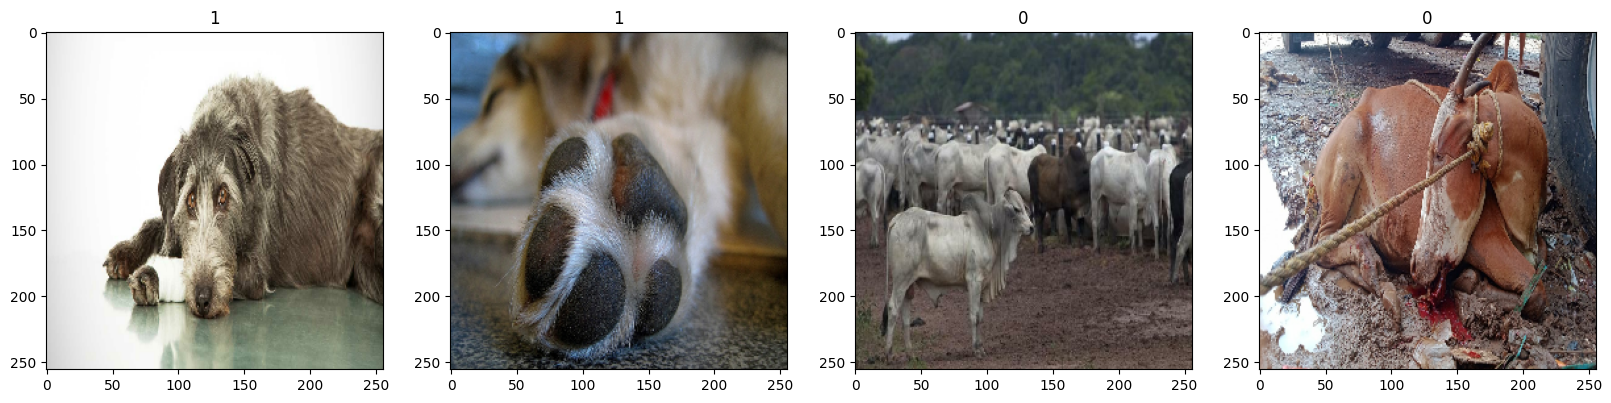

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.47666207, 0.45313266, 0.4609758 ],
          [0.6480066 , 0.61593425, 0.6101906 ],
          [0.6322337 , 0.5977383 , 0.582551  ],
          ...,
          [0.36988896, 0.38364726, 0.42712155],
          [0.43679535, 0.4571538 , 0.5294118 ],
          [0.365288  , 0.38489583, 0.45940563]],
 
         [[0.48583028, 0.46230087, 0.47154367],
          [0.58699363, 0.55874866, 0.55831885],
          [0.59913784, 0.5626489 , 0.55344236],
          ...,
          [0.36621365, 0.37797835, 0.42145264],
          [0.46223783, 0.48209932, 0.55584824],
          [0.39752606, 0.4171339 , 0.4942402 ]],
 
         [[0.45217416, 0.42810312, 0.44755343],
          [0.50558364, 0.48003548, 0.48705032],
          [0.58401406, 0.54847807, 0.5427872 ],
          ...,
          [0.34412077, 0.34821084, 0.39697003],
          [0.4100195 , 0.43043923, 0.5048713 ],
          [0.3732449 , 0.3932587 , 0.47250196]],
 
         ...,
 
         [[0.49303228, 0.5008754 , 0.44989502],
          [0.37205

In [ ]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)
test_size = int(len(data)*.1)

In [ ]:
train_size

5

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 13s 2s/step - loss: 1.6409 - accuracy: 0.3938 - val_loss: 0.7696 - val_accuracy: 0.4062
Epoch 2/20
5/5 [==============================] - 12s 2s/step - loss: 0.6875 - accuracy: 0.5125 - val_loss: 0.6598 - val_accuracy: 0.7344
Epoch 3/20
5/5 [==============================] - 12s 2s/step - loss: 0.6509 - accuracy: 0.6625 - val_loss: 0.6490 - val_accuracy: 0.6250
Epoch 4/20
5/5 [==============================] - 13s 3s/step - loss: 0.6607 - accuracy: 0.5562 - val_loss: 0.6417 - val_accuracy: 0.5625
Epoch 5/20
5/5 [==============================] - 12s 2s/step - loss: 0.6523 - accuracy: 0.5875 - val_loss: 0.5937 - val_accuracy: 0.6562
Epoch 6/20
5/5 [==============================] - 13s 3s/step - loss: 0.6050 - accuracy: 0.6562 - val_loss: 0.5673 - val_accuracy: 0.8438
Epoch 7/20
5/5 [==============================] - 12s 2s/step - loss: 0.5430 - accuracy: 0.8000 - val_loss: 0.5213 - val_accuracy: 0.7344
Epoch 8/20
5/5 [==================

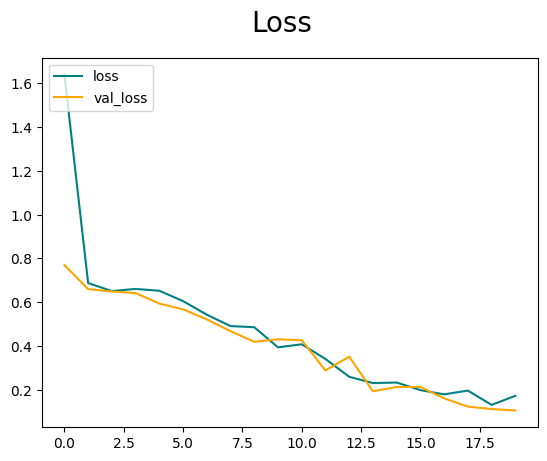

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

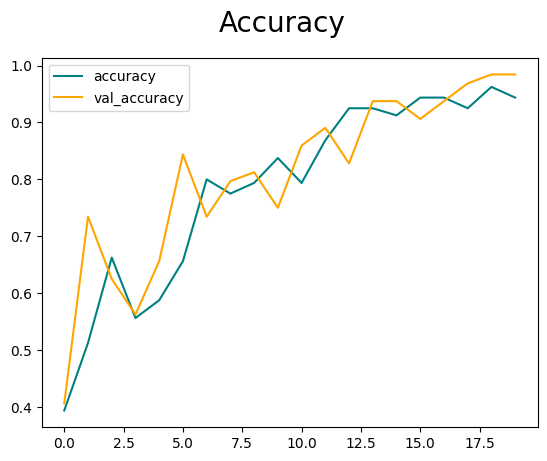

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
import cv2

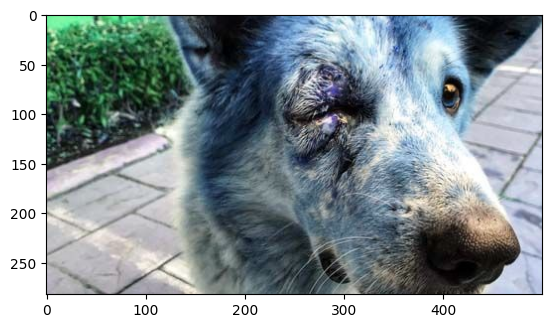

In [ ]:
img = cv2.imread('/content/Data/Dogs/2edc2b1c9f87d1756b12f06e018e0309.jpg')
plt.imshow(img)
plt.show()

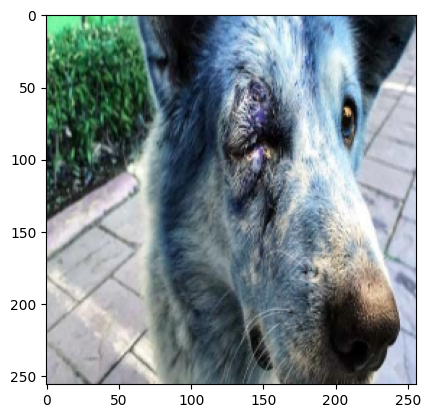

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 53ms/step


In [ ]:
yhat

array([[0.9967201]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cow')

Predicted class is Dog


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('/content/models/imageclassifier.h5')

In [ ]:
new_model = load_model('/content/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 84ms/step


array([[0.11303823]], dtype=float32)